In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [6]:
# init setup on exp
exp.setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.9310
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0080
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.0960
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0040
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0160
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.1170
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.0150
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0040


In [8]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0050
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0090
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0030
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0050
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.0870
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0040
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0140
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.0370
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.0140
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0040


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

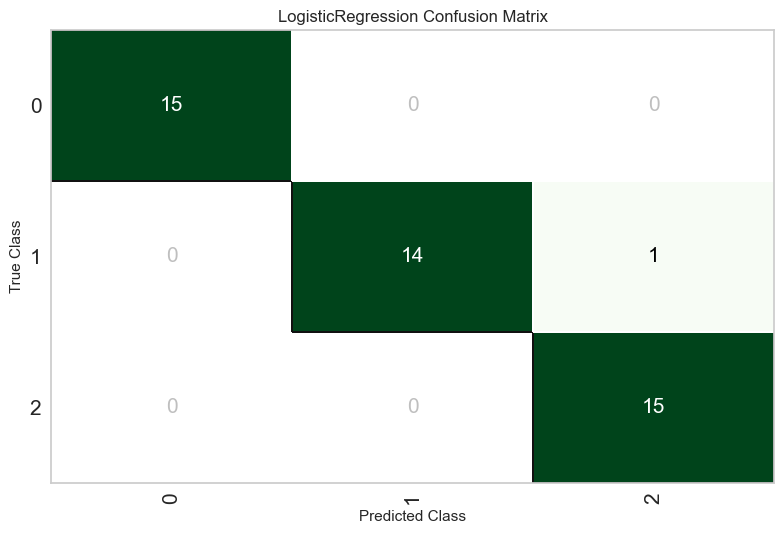

In [9]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

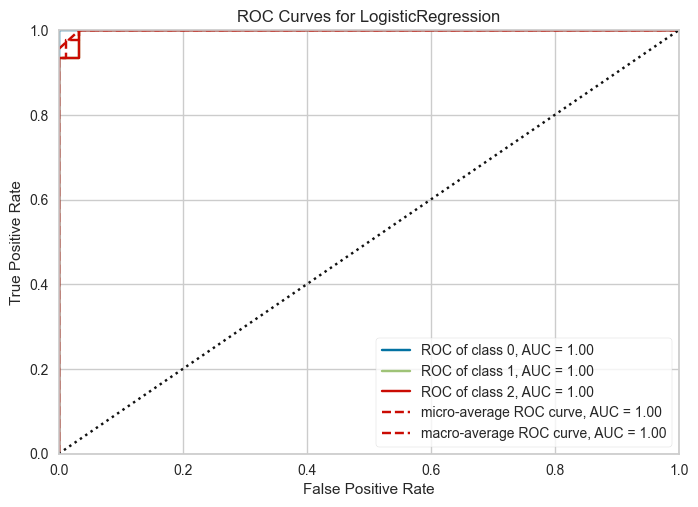

In [10]:
# plot AUC
plot_model(best, plot = 'auc')

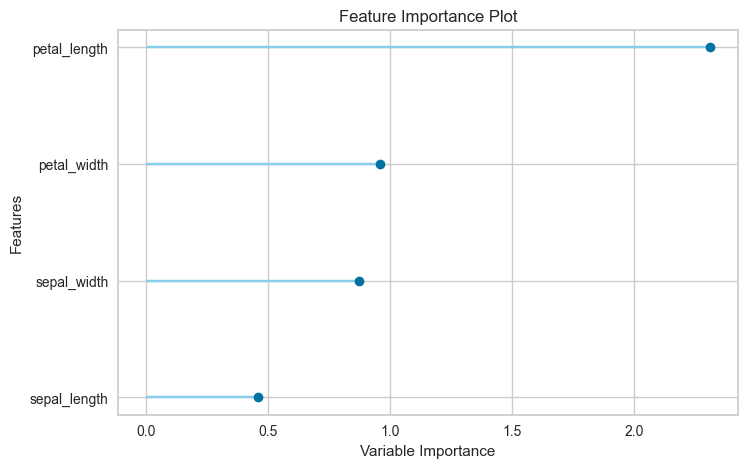

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,0.9985,0.9778,0.9792,0.9778,0.9667,0.9674


In [15]:
# show predictions df
holdout_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5203
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9503
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9334
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.7320
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9953


In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('species', axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,0.9775
1,4.9,3.0,1.4,0.2,Iris-setosa,0.9678
2,4.7,3.2,1.3,0.2,Iris-setosa,0.9820
3,4.6,3.1,1.5,0.2,Iris-setosa,0.9719
4,5.0,3.6,1.4,0.2,Iris-setosa,0.9813


In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [20]:
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
16,5.4,3.9,1.3,0.4
88,5.6,3.0,4.1,1.3
130,7.4,2.8,6.1,1.9
6,4.6,3.4,1.4,0.3
...,...,...,...,...
58,6.6,2.9,4.6,1.3
41,4.5,2.3,1.3,0.3
12,4.8,3.0,1.4,0.1
20,5.4,3.4,1.7,0.2


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [24]:
# help(setup)

In [25]:
# init setup with normalize = True

s = setup(data, target = 'species', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


<Axes: >

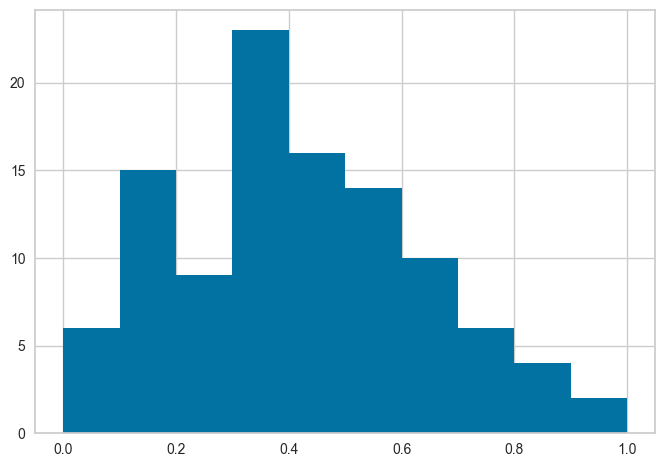

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['sepal_length'].hist()

<Axes: >

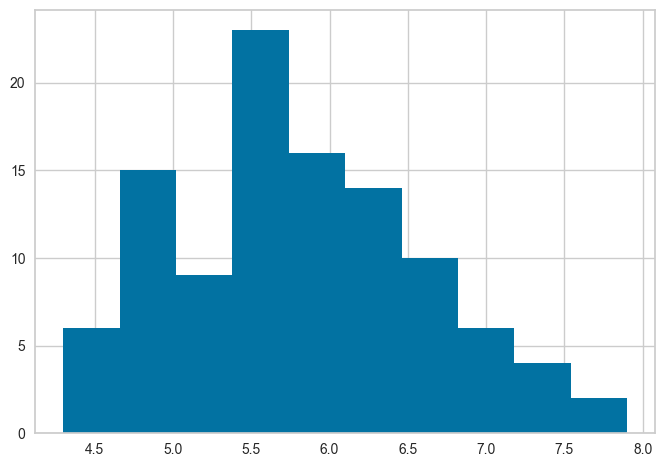

In [27]:
get_config('X_train')['sepal_length'].hist()

In [28]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
knn,K Neighbors Classifier,0.9636,0.9844,0.9636,0.9709,0.9631,0.9450,0.9494,0.0100
lightgbm,Light Gradient Boosting Machine,0.9536,0.9857,0.9536,0.9634,0.9528,0.9298,0.9356,0.0930
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0050
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0150
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.0650
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0040
rf,Random Forest Classifier,0.9264,0.9903,0.9264,0.9343,0.9232,0.8886,0.8956,0.0240
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.0180


In [29]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9536,0.9857,0.9536,0.9634,0.9528,0.9298,0.9356,0.0920
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0150
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.0540
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0050
rf,Random Forest Classifier,0.9264,0.9903,0.9264,0.9343,0.9232,0.8886,0.8956,0.0170
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.0210
xgboost,Extreme Gradient Boosting,0.9255,0.9710,0.9255,0.9360,0.9239,0.8870,0.8937,0.0060


In [31]:
compare_tree_models

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9536,0.9857,0.9536,0.9634,0.9528,0.9298,0.9356,0.092
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.015
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.054
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.005
rf,Random Forest Classifier,0.9264,0.9903,0.9264,0.9343,0.9232,0.8886,0.8956,0.017
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.021
xgboost,Extreme Gradient Boosting,0.9255,0.9710,0.9255,0.9360,0.9239,0.8870,0.8937,0.006


In [33]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
knn,K Neighbors Classifier,0.9636,0.9844,0.9636,0.9709,0.9631,0.9450,0.9494,0.0100
lightgbm,Light Gradient Boosting Machine,0.9536,0.9857,0.9536,0.9634,0.9528,0.9298,0.9356,0.0870
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0040
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0140
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.0420
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0040
rf,Random Forest Classifier,0.9264,0.9903,0.9264,0.9343,0.9232,0.8886,0.8956,0.0170
gbc,Gradient Boosting Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.0150


In [34]:
# list of top 3 models by Recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [35]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [36]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.8182,0.0000,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.0000,0.6364,0.6364,0.6364,0.4500,0.4500
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616


In [37]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.8182,0.0,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.0,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.0,0.6364,0.6364,0.6364,0.4500,0.4500
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.0,0.9000,0.9250,0.8971,0.8485,0.8616


In [38]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.0000,0.9143,0.9158,0.9140,0.8712,0.8722
1,0.8857,0.0000,0.8857,0.8922,0.8849,0.8284,0.8325
2,0.9714,0.0000,0.9714,0.9736,0.9713,0.9571,0.9582
Mean,0.9238,0.0000,0.9238,0.9272,0.9234,0.8856,0.8877
Std,0.0356,0.0000,0.0356,0.0342,0.0359,0.0535,0.0525


In [39]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.8182,0.0000,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.0000,0.7273,0.7333,0.7229,0.5875,0.5950
4,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8571,0.8182,0.8788,0.8061,0.7250,0.7642
1,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.7857,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [42]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.8442,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [43]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [44]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.8442,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9571,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [45]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.8442,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [47]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['sepal_length',
                                                                          'sepal_width',
                                                                          'p...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [48]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.8896,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.7857,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [49]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9870,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.9481,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9857,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [50]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.0000,0.6364,0.6364,0.6121,0.4500,0.4743
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [51]:
# top 3 models based on recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [52]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


VotingClassifier(estimators=[('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covariance_estimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform'))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [53]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


StackingClassifier(cv=5,
                   estimators=[('Quadratic Discriminant Analysis',
                                QuadraticDiscriminantAnalysis(priors=None,
                                                              reg_param=0.0,
                                                              store_covariance=False,
                                                              tol=0.0001)),
                               ('Linear Discriminant Analysis',
                                LinearDiscriminantAnalysis(covariance_estimator=None,
                                                           n_components=None,
                                                           priors=None,
                                                           shrinkage=None,
                                                           solver='svd',
                                                           store_covariance=False,
                                                           tol=0.0001)),
                               ('K Neighbors...
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

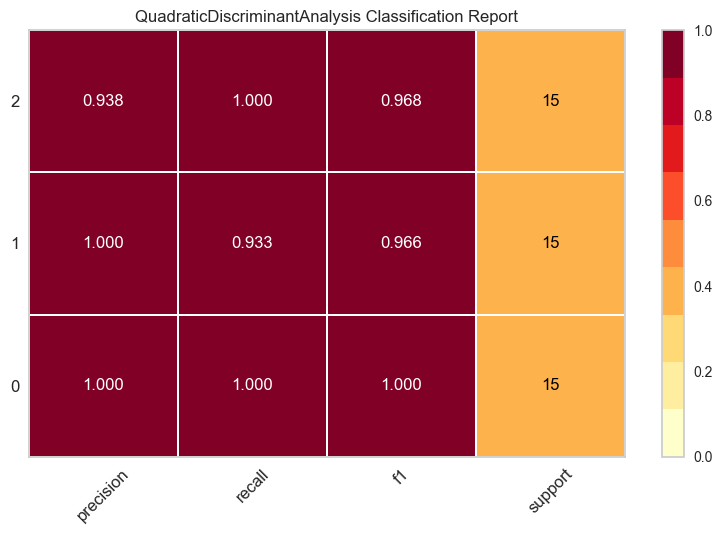

In [54]:
# plot class report
plot_model(best, plot = 'class_report')

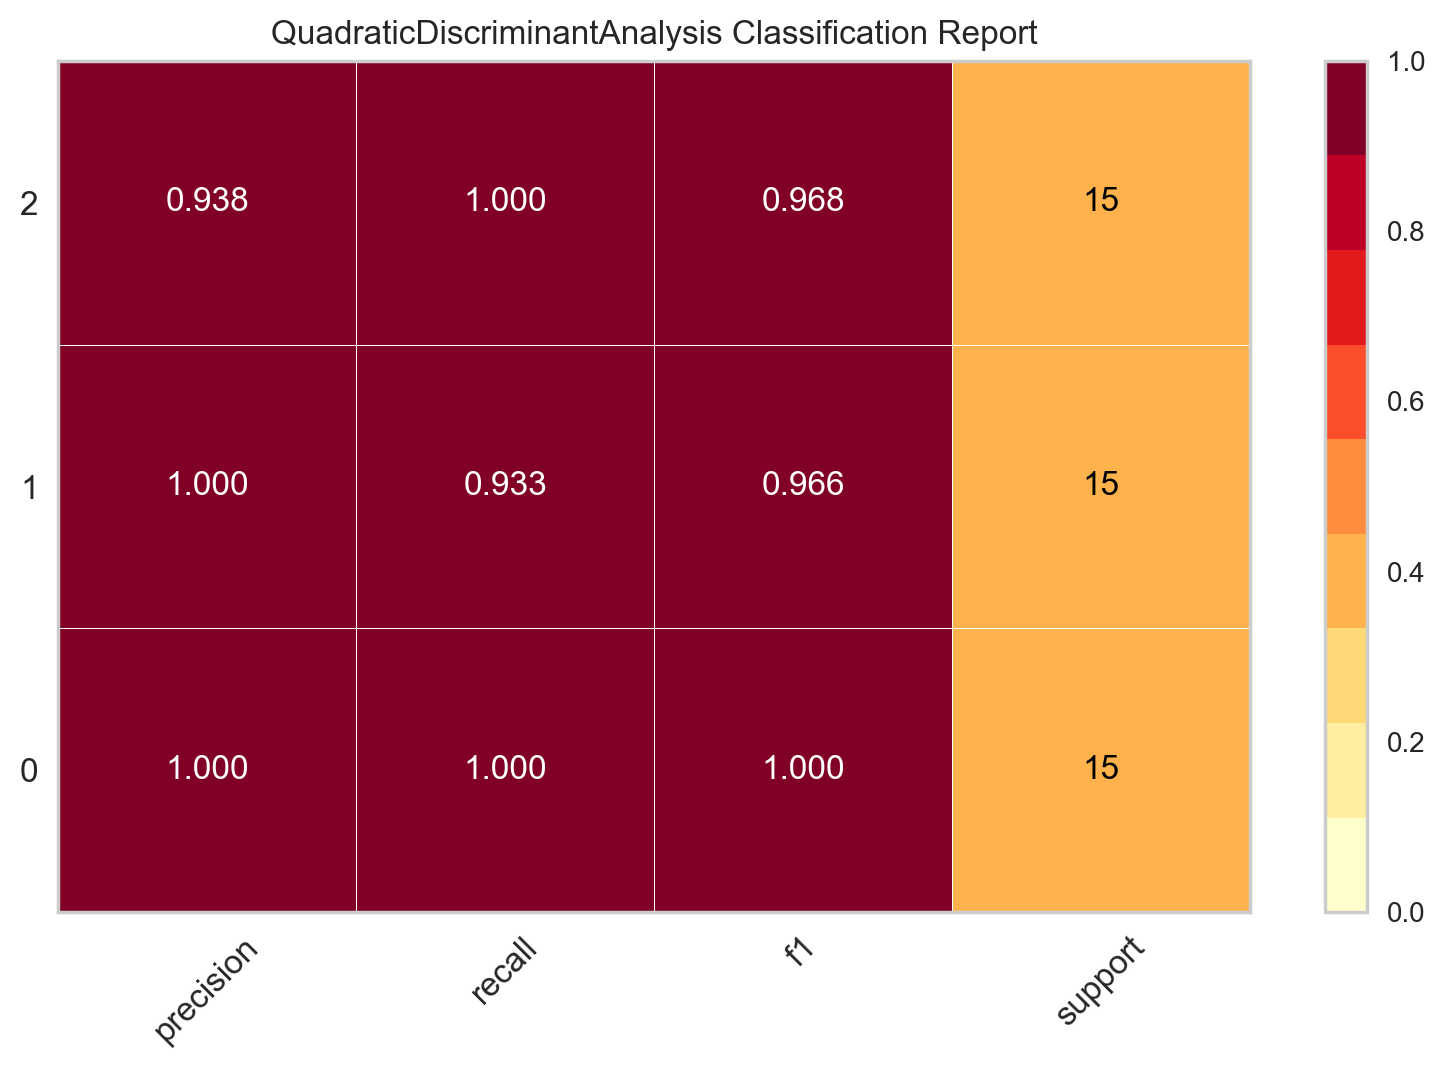

In [55]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [56]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [57]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9351,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9221,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


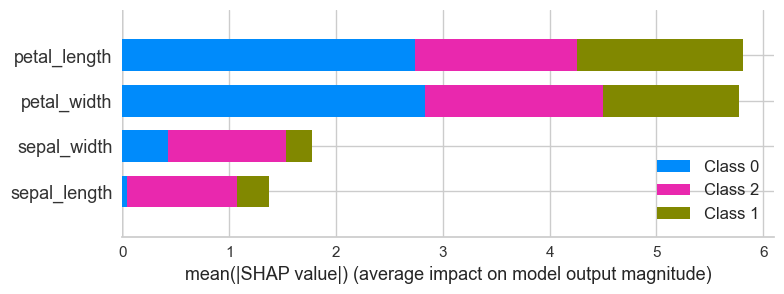

In [58]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [59]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

This function returns the leaderboard of all models trained in the current setup.

In [60]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9073,0.0000,0.9073,0.9159,0.9064,0.8597,0.8645
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9636,0.9844,0.9636,0.9709,0.9631,0.9450,0.9494
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8100,0.0000,0.8100,0.7831,0.7702,0.7125,0.7527
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8318,0.0000,0.8318,0.8545,0.8281,0.7459,0.7595
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9264,0.9903,0.9264,0.9343,0.9232,0.8886,0.8956
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9155,0.0000,0.9155,0.9401,0.9097,0.8720,0.8873


In [61]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empt...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)]],
         verbose=False)

In [62]:
automl()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [63]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating 

In [64]:
# create gradio app
create_app(best)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [65]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [66]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [67]:
final_best = finalize_model(best)

In [68]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empt...
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

In [69]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[2] <= 0.23275858908891678) {
            var0 = new double[] {1.0, 0.0, 0.0};
        } else {
            if (input[2] <= 0.62931028008461) {
                if (input[0] <= 0.180555522441864) {
                    var0 = new double[] {0.0, 0.0, 1.0};
                } else {
                    var0 = new double[] {0.0, 1.0, 0.0};
                }
            } else {
                if (input[2] <= 0.6637930274009705) {
                    if (input[1] <= 0.3958333134651184) {
                        var0 = new double[] {0.0, 0.0, 1.0};
                    } else {
                        var0 = new double[] {0.0, 1.0, 0.0};
                    }
                } else {
                    if (input[3] <= 0.6666666269302368) {
                        if (input[3] <= 0.6041666567325592) {
                            var0 = new double[] {0.0, 0.0, 1.0};
                  

In [70]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               copy=True,
                                                               fill_value=None,
                                                         

In [71]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(...
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

In [72]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


: 